# Описание проекта
Нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.<br>
Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.<br>
Идея решения задачи от заказчика: 
- Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties);
- Для модели выбрать тип виновника — только машина (car);
- Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).

Для моделирования ограничиться данными за 2012 год.
Обязательное условие — учесть фактор возраста автомобиля.
На основе модели исследовать основные факторы ДТП.<br>
Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
- Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
- Какие ещё факторы нужно учесть?
- Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

В ходе выполнения проекта как целевая метрика будет использована метрика **F1-score** потому, что данный показатель способен выдать более надежные результаты, чем accuracy вне зависимости от баланса классов. Также в связи с тем, что в данной ситуации важно учесть показатели recall и presition, которые принимают участие в расчете показателя F1. 

Краткое описание таблиц
- collisions — общая информация о ДТП. 
Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.

- parties — информация об участниках ДТП. 
Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.

- vehicles — информация о пострадавших машинах. 
Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

## collisions (информация о происшествиях)

<table>
    <thead>
        <tr>
            <th>Описание</th>
            <th>Обозначение в таблице</th>
            <th>Подробнее  </th>
        </tr>
    </tread>
    <tbody>
        <tr>
            <td>Идентификационный номер <br> в базе данных</td>
            <td align="center">CASE_ID</td>
            <td align="left">Уникальный номер для зарегистрированного <br> происшествия в таблице происшествий.</td>
        </tr>
        <tr>
            <td>Дата происшествия</td>
            <td align="center">COLLISION_DATE</td>
            <td align="left">Формат год/месяц/день</td>
        </tr>
        <tr>
            <td>Время происшествия</td>
            <td align="center">COLLISION_TIME</td>
            <td align="left">Формат: 24-часовой</td>
        </tr>
        <tr>
            <td rowspan=3 align="left">Является ли место происшествие перекрёстком	</td>
            <td rowspan=3 align="center">INTERSECTION</td>
            <td align="left">Y — Intersection (перекрёсток)</td>
        </tr>
        <tr>
            <td align="left">N — Not Intersection (не перекрёсток)</td>
        </tr>
        <tr>
            <td align="left">-- — Not stated (Не указано)</td>
        </tr>
        <tr>
            <td rowspan=8 align="left">Погода</td>
            <td rowspan=8 align="center">WEATHER_1</td>
            <td align="left">A — Clear (Ясно)</td>
        </tr>
        <tr>
            <td align="left">B — Cloudy (Облачно)</td>
        </tr>
        <tr>
            <td align="left">C — Raining (Дождь)</td>
        </tr>
         <tr>
            <td align="left">D — Snowing (Снегопад)</td>
        </tr>
        <tr>
            <td align="left">E — Fog (Туман)</td>
        </tr>
         <tr>
            <td align="left">F — Other (Другое)</td>
        </tr>
        <tr>
            <td align="left">G — Wind (Ветер)</td>
        </tr>
         <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
         <tr>
            <td rowspan=5 align="left">Серьёзность происшествия	</td>
            <td rowspan=5 align="center">COLLISION_DAMAGE</td>
            <td align="left">1 — FATAL ТС (Не подлежит восстановлению)</td>
        </tr>
        <tr>
            <td align="left">2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)</td>
        </tr>
        <tr>
            <td align="left">3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)</td>
        </tr>
         <tr>
            <td align="left">4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)</td>
        </tr>
        <tr>
            <td align="left">0 – SCRATCH (Царапина)</td>
        </tr>
        <tr>
            <td rowspan=6 align="left">Основной фактор аварии</td>
            <td rowspan=6 align="center">PRIMARY_COLL_FACTOR</td>
            <td align="left">A — Code Violation (Нарушение правил ПДД)</td>
        </tr>
        <tr>
            <td align="left">B — Other Improper Driving (Другое неправильное вождение)</td>
        </tr>
        <tr>
            <td align="left">C — Other Than Driver (Кроме водителя)</td>
        </tr>
         <tr>
            <td align="left">D — Unknown (Неизвестно)</td>
        </tr>
        <tr>
            <td align="left">E — Fell Asleep (Заснул)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td rowspan=5 align="left">Состояние дороги	</td>
            <td rowspan=5 align="center">ROAD_SURFACE</td>
            <td align="left">A — Dry (Сухая)</td>
        </tr>
        <tr>
            <td align="left">B — Wet (Мокрая)</td>
        </tr>
        <tr>
            <td align="left">C — Snowy or Icy (Заснеженная или обледенелая)</td>
        </tr>
         <tr>
            <td align="left">D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td rowspan=6 align="left">Освещение</td>
            <td rowspan=6 align="center">LIGHTING</td>
            <td align="left">A — Daylight (Дневной свет)</td>
        </tr>
        <tr>
            <td align="left">B — Dusk-Dawn (Сумерки-Рассвет)</td>
        </tr>
        <tr>
            <td align="left">C — Dark-Street Lights (Темно-Уличные фонари)</td>
        </tr>
         <tr>
            <td align="left">D — Dark-No Street Lights (Темно-Нет уличных фонарей)</td>
        </tr>
        <tr>
            <td align="left">E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td>Номер географических районов, где произошло ДТП	</td>
            <td align="center">COUNTY_CITY_LOCATION</td>
            <td align="left">число</td>
        </tr>
        <tr>
            <td>Названия географических районов, где произошло ДТП	</td>
            <td align="center">COUNTY_LOCATION</td>
            <td align="left">список разных названий, категориальный тип данных</td>
        </tr>
        <tr>
            <td rowspan=6 align="left">Направление движения</td>
            <td rowspan=6 align="center">DIRECTION</td>
            <td align="left">N — North (Север)</td>
        </tr>
        <tr>
            <td align="left">E — East (Восток)</td>
        </tr>
        <tr>
            <td align="left">S — South (Юг)</td>
        </tr>
         <tr>
            <td align="left">W — West (Запад)</td>
        </tr>
        <tr>
            <td align="left">- or blank — Not State (Не указано)</td>
        </tr>
        <tr>
            <td align="left">на перекрёстке</td>
        </tr>
        <tr>
            <td>Расстояние от главной дороги (метры)</td>
            <td align="center">DISTANCE</td>
            <td align="left">число</td>
        </tr>
        <tr>
            <td rowspan=4 align="left">Тип дороги</td>
            <td rowspan=4 align="center">LOCATION_TYPE</td>
            <td align="left">H — Highway (Шоссе)</td>
        </tr>
        <tr>
            <td align="left">I — Intersection (Перекрёсток)</td>
        </tr>
        <tr>
            <td align="left">R — Ramp (or Collector) (Рампа)</td>
        </tr>
         <tr>
            <td align="left">- or blank — Not State Highway (Не указано)</td>
        </tr>
        <tr>
            <td>Количество участников</td>
            <td align="center">PARTY_COUNT</td>
            <td align="left">число</td>
        </tr>
        <tr>
            <td rowspan=26 align="left">Категория нарушения</td>
            <td rowspan=26 align="center">PCF_VIOLATION_CATEGORY</td>
            <td align="left">01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)</td>
        </tr>
        <tr>
            <td align="left">02 — Impeding Traffic (Препятствие движению транспорта)</td>
        </tr>
        <tr>
            <td align="left">03 — Unsafe Speed (Превышение скорости)</td>
        </tr>
        <tr>
            <td align="left">04 — Following Too Closely (Опасное сближение)</td>
        </tr>        
        <tr>
            <td align="left">05 — Wrong Side of Road (Неправильная сторона дороги)</td>
        </tr>
        <tr>
            <td align="left">06 — Improper Passing (Неправильное движение)</td>
        </tr>
        <tr>
            <td align="left">07 — Unsafe Lane Change (Небезопасная смена полосы движения)</td>
        </tr>  
        <tr>
            <td align="left">08 — Improper Turning (Неправильный поворот)</td>
        </tr>
        <tr>
            <td align="left">09 — Automobile Right of Way (Автомобильное право проезда)</td>
        </tr>
        <tr>
            <td align="left">10 — Pedestrian Right of Way (Пешеходное право проезда)</td>
        </tr>  
        <tr>
            <td align="left">11 — Pedestrian Violation (Нарушение пешеходами)</td>
        </tr>
        <tr>
            <td align="left">12 — Traffic Signals and Signs (Дорожные сигналы и знаки)</td>
        </tr>
        <tr>
            <td align="left">13 — Hazardous Parking (Неправильная парковка)</td>
        </tr>  
        <tr>
            <td align="left">14 — Lights (Освещение)</td>
        </tr>
        <tr>
            <td align="left">15 — Brakes (Тормоза)</td>
        </tr>
        <tr>
            <td align="left">16 — Other Equipment (Другое оборудование)</td>
        </tr>  
        <tr>
            <td align="left">17 — Other Hazardous Violation (Другие нарушения)</td>
        </tr>
        <tr>
            <td align="left">18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)</td>
        </tr>
        <tr>
            <td align="left">19 — Speeding (Скорость)</td>
        </tr>  
        <tr>
            <td align="left">20 — Pedestrian dui (Нарушение пешехода)</td>
        </tr>
        <tr>
            <td align="left">21 — Unsafe Starting or Backing (Опасный старт)</td>
        </tr>
        <tr>
            <td align="left">22 — Other Improper Driving (Другое неправильное вождение)</td>
        </tr>  
        <tr>
            <td align="left">23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)</td>
        </tr>
        <tr>
            <td align="left">24 — Fell Asleep (Заснул)</td>
        </tr>
        <tr>
            <td align="left">00 — Unknown (Неизвестно)</td>
        </tr>  
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td rowspan=10 align="left">Дополнительные участники ДТП	</td>
            <td rowspan=10 align="center">MOTOR_VEHICLE_INVOLVED_WITH</td>
            <td align="left">Other motor vehicle (Другой автомобиль)</td>
        </tr>
        <tr>
            <td align="left">Fixed object (Неподвижный объект)</td>
        </tr>
        <tr>
            <td align="left">Parked motor vehicle (Припаркованный автомобиль)</td>
        </tr>
        <tr>
            <td align="left">Pedestrian (Пешеход)</td>
        </tr>
        <tr>
            <td align="left">Bicycle (Велосипедист)</td>
        </tr>
        <tr>
            <td align="left">Non-collision (Не столкновение)</td>
        </tr>
        <tr>
            <td align="left">Other object (Другой объект)</td>
        </tr>
        <tr>
            <td align="left">Motor vehicle on other roadway (Автомобиль на другой проезжей)</td>
        </tr>
        <tr>
            <td align="left">Animal (Животное)</td>
        </tr>
        <tr>
            <td align="left">Train (Поезд)</td>
        </tr>
        <tr>
            <td rowspan=9 align="left">Дорожное состояние</td>
            <td rowspan=9 align="center">ROAD_CONDITION_1</td>
            <td align="left">A — Holes, Deep Ruts (Ямы, глубокая колея)</td>
        </tr>
        <tr>
            <td align="left">B — Loose Material on Roadway (Сыпучий материал на проезжей части)</td>
        </tr>
        <tr>
            <td align="left">C — Obstruction on Roadway (Препятствие на проезжей части)</td>
        </tr>
        <tr>
            <td align="left">D — Construction or Repair Zone (Зона строительства или ремонта)</td>
        </tr>
        <tr>
            <td align="left">E — Reduced Roadway Width (Уменьшенная ширина проезжей части)</td>
        </tr>
        <tr>
            <td align="left">F — Flooded (Затоплено)</td>
        </tr>
        <tr>
            <td align="left">G — Other (Другое)</td>
        </tr>
        <tr>
            <td align="left">H — No Unusual Condition (Нет ничего необычного)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td rowspan=5 align="left">Устройство управления</td>
            <td rowspan=5 align="center">CONTROL_CONDITION_1</td>
            <td align="left">A — Functioning (Функционирует)</td>
        </tr>
        <tr>
            <td align="left">B — Not Functioning (Не функционирует)</td>
        </tr>
        <tr>
            <td align="left">C — Obscured (Затемнённый)</td>
        </tr>
        <tr>
            <td align="left">D — None (Нет)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
    </tbody>
</table>

## Parties (описание участников происшествия)

<table>
    <thead>
        <tr>
            <th>Описание</th>
            <th>Обозначение в таблице</th>
            <th>Подробнее</th>
        </tr>
    </tread>
    <tbody>
        <tr>
            <td>Идентификационный номер <br> в базе данных</td>
            <td align="center">CASE_ID</td>
            <td>Уникальный номер для зарегистрированного <br> происшествия в таблице происшествий.</td>
        </tr>
        <tr>
            <td>Номер участника происшествия</td>
            <td align="center">PARTY_NUMBER</td>
            <td align="left">От 1 до N — по числу участников происшествия</td>
        </tr>
        <tr>
            <td rowspan=7 align="left">Тип участника происшествия</td>
            <td rowspan=7 align="center">PARTY_TYPE</td>
            <td align="left">1 — Car (Авто)</td>
        </tr>
        <tr>
            <td align="left">2 — Road bumper (Дорожные знаки)</td>
        </tr>
        <tr>
            <td align="left">3 — Building (Строения)</td>
        </tr>
         <tr>
            <td align="left">4 — Road signs (Отбойник)</td>
        </tr>
        <tr>
            <td align="left">5 — Other (Другое)</td>
        </tr>
         <tr>
            <td align="left">6 — Operator (Оператор)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td>Виновность участника</td>
            <td align="center">AT_FAULT</td>
            <td align="center">0/1</td>
        </tr>
        <tr>
            <td>Сумма страховки (тыс. $)</td>
            <td align="center">INSURANCE_PREMIUM</td>
            <td align="center">число</td>
        </tr>
        <tr>
            <td rowspan=5 align="left">Состояние участника: физическое или с учётом принятых лекарств	</td>
            <td rowspan=5 align="center">PARTY_DRUG_PHYSICAL</td>
            <td align="left">E — Under Drug Influence (Под воздействием лекарств)</td>
        </tr>
        <tr>
            <td align="left">F — Impairment — Physical (Ухудшение состояния)</td>
        </tr>
        <tr>
            <td align="left">G — Impairment Unknown (Не известно)</td>
        </tr>
         <tr>
            <td align="left">H — Not Applicable (Не оценивался)</td>
        </tr>
        <tr>
            <td align="left">- — Not Stated (Не указано)</td>
        </tr>
        <tr>
            <td>Наличие телефона в автомобиле (возможности разговаривать по громкой связи)</td>
            <td align="center">CELLPHONE_IN_USE</td>
            <td align="left">0/1</td>
        </tr>
    </tbody>
</table>

## Vehicles (Описание автомобиля)

<table>
    <thead>
        <tr>
            <th>Описание</th>
            <th>Обозначение в таблице</th>
            <th>Подробнее</th>
        </tr>
    </tread>
    <tbody>
        <tr>
            <th>Индекс текущей таблицы</th>
            <th>ID</th>
            <th>Номер в таблице</th>
        </tr>
        <tr>
            <td>Идентификационный номер <br> в базе данных</td>
            <td align="center">CASE_ID</td>
            <td>Уникальный номер для зарегистрированного <br> происшествия в таблице происшествий. </td>
        </tr>
        <tr>
            <td rowspan=5 align="left">Тип кузова</td>
            <td rowspan=5 align="center">VEHICLE_TYPE</td>
            <td align="left">MINIVEN</td>
        </tr>
        <tr>
            <td align="left">COUPE</td>
        </tr>
        <tr>
            <td align="left">SEDAN</td>
        </tr>
        <tr>
            <td align="left">HATCHBACK</td>
        </tr>
        <tr>
            <td align="left">OTHER</td>
        </tr>
        <tr>
            <td rowspan=3 align="left">Тип КПП</td>
            <td rowspan=3 align="center">VEHICLE_TRANSMISSION</td>
            <td align="left">auto (автоматическая)</td>
        </tr>
        <tr>
            <td align="left">manual (ручная)</td>
        </tr>
        <tr>
            <td align="left">Not Stated (не указано)</td>
        </tr>
        <tr>
            <td>Возраст автомобиля (в годах)</td>
            <td align="center">VEHICLE_AGE</td>
            <td align="left">число</td>
        </tr>
    </tbody>
</table>

### [Оглавление](#section_0)<br>
[1. Импорты и настройки](#section_1)<br>
[2. Загрузка таблицы SQL](#section_2)<br>
[3. Первичное исследование таблиц](#section_3)<br>
[4. Статистический анализ факторов ДТП](#section_4)<br>
[5. Модель для оценки водительского риска](#section_5)<br>
[6. Поиск лучшей модели](#section_6)<br>
[7. Проверка лучшей модели](#section_7)<br>
[8. Выводы](#section_8)<br>

[К оглавлению](#section_0)
<a id='section_1'></a>
# Импорты и настройки 

In [1]:
import datetime as dt
import numpy as np
import optuna
import os
import pandas as pd
import seaborn as sns
import shap
import warnings

from catboost import CatBoostClassifier, Pool
from category_encoders.binary import BinaryEncoder
from matplotlib import pyplot as plt
from optuna.integration import CatBoostPruningCallback
from phik.report import plot_correlation_matrix
from psycopg2 import OperationalError, connect, extras
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from xgboost import XGBClassifier


shap.initjs()
RANDOM_STATE = 13

In [2]:
# настройки
pd.options.display.float_format = '{:_.4f}'.format
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

In [3]:
# Фиксация случайных состояний
def set_seed(seed: int = RANDOM_STATE) -> None:
    """
    Функция для сохранения случайных состояний во всех используемых библиотеках.

    Args:
        seed: случайное состояние
    """

    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    # random.seed(seed)
    # torch.manual_seed(seed)
    # if torch.cuda.is_available():
    #     torch.cuda.manual_seed(seed)
    #     torch.cuda.manual_seed_all(seed)
    # torch.backends.cudnn.benchmark = False
    # torch.backends.cudnn.deterministic = True

    print(f'Случайное состояние зафиксировано.')

set_seed()    
    
# Изучение данных
def get_data_info(df:pd.DataFrame) -> None:
    display(df.sample(5))
    display(df.info())
    display(df.describe(include='all').T)
    print(f'Количество пропусков в данных: \n{df.isna().sum().sort_values(ascending=False)}')    
    print(f'Кол-во дубликатов в данных = {df.duplicated().sum()}')

# Разделение данных
def df_split(X:pd.DataFrame, y:pd.DataFrame=None, train_size:float=0.7) ->pd.DataFrame:
    if y is not None:
        return train_test_split(X, y,
                                random_state=RANDOM_STATE,
                                train_size=train_size,
                                shuffle=True
                                )
    else:
        return train_test_split(X,
                                random_state=RANDOM_STATE,
                                train_size=train_size,
                                shuffle=True
                                )

Случайное состояние зафиксировано.


[К оглавлению](#section_0)
<a id='section_2'></a>
### Загрузка таблицы SQL

In [4]:
# Функция создания подключения к базе данных
def create_connection():
    try:
        connection = connect(
            database='data-science-vehicle-db',
            user='praktikum_student',
            password='Sdf4$2;d-d30pp',
            host='rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            port=6432,
        )
        print("Соединение с PostgreSQL DB установлено")
    except OperationalError as e:
        print(f"Произошла ошибка: '{e}'")
    return connection


# Функция получения запросов из БД. 
def execute_read_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except OperationalError as e:
        print(f"Произошла ошибка: '{e}'")

In [5]:
# Подключусь к базе
connection = create_connection()

Соединение с PostgreSQL DB установлено


[К оглавлению](#section_0)
<a id='section_3'></a>
# Первичное исследование таблиц

In [6]:
# Посмотрю на состав таблиц и типы данных. 
query_get_db_data = """
   SELECT * 
   FROM information_schema.columns
   WHERE table_schema NOT IN ('information_schema', 'pg_catalog')
   ORDER BY table_schema, table_name
   """

cursor = connection.cursor(cursor_factory=extras.DictCursor)
cursor.execute(query_get_db_data)

for row in cursor:
    print(f"table: {row['table_name']}, column: {row['column_name']}, type: {row['data_type']}")

table: case_ids, column: case_id, type: text
table: case_ids, column: db_year, type: text
table: collisions, column: collision_damage, type: text
table: collisions, column: county_city_location, type: text
table: collisions, column: county_location, type: text
table: collisions, column: party_count, type: integer
table: collisions, column: direction, type: text
table: collisions, column: location_type, type: text
table: collisions, column: weather_1, type: text
table: collisions, column: collision_date, type: date
table: collisions, column: collision_time, type: time without time zone
table: collisions, column: case_id, type: text
table: collisions, column: pcf_violation_category, type: text
table: collisions, column: motor_vehicle_involved_with, type: text
table: collisions, column: road_surface, type: text
table: collisions, column: road_condition_1, type: text
table: collisions, column: lighting, type: text
table: collisions, column: control_device, type: text
table: collisions, col

In [7]:
execute_read_query(connection=connection, query='SELECT COUNT(case_id) FROM collisions;')

[(1400000,)]

In [8]:
execute_read_query(connection=connection, query='SELECT COUNT(case_id) FROM parties;',)

[(2752408,)]

In [9]:
execute_read_query(connection=connection, query='SELECT COUNT(case_id) FROM vehicles;')

[(1021234,)]

Вижу 3 таблицы с перечнем колонок в каждой, соответствующих изначальному описанию в задании. Количество колонок и типы данных соответствуют.
Во всех таблицах присутствует колонка 'case_id', указанная в схеме как первичный ключ для связи таблиц.
В таблицах присутствует разное количество строк.   

[К оглавлению](#section_0)
<a id='section_4'></a>
# Статистический анализ факторов ДТП

#### Распределение аварий по месяцам

In [10]:
# Посмотрю, в какие месяцы произошло наибольшее количество аварий за 2012 год
q = '''
SELECT EXTRACT(MONTH FROM CAST(c.collision_date as date)) as month, COUNT(case_id)
FROM collisions c
WHERE EXTRACT(YEAR FROM CAST(c.collision_date as date)) = 2012
GROUP BY EXTRACT(MONTH FROM CAST(c.collision_date as date));
'''

collisions_count = pd.read_sql_query(q, connection)

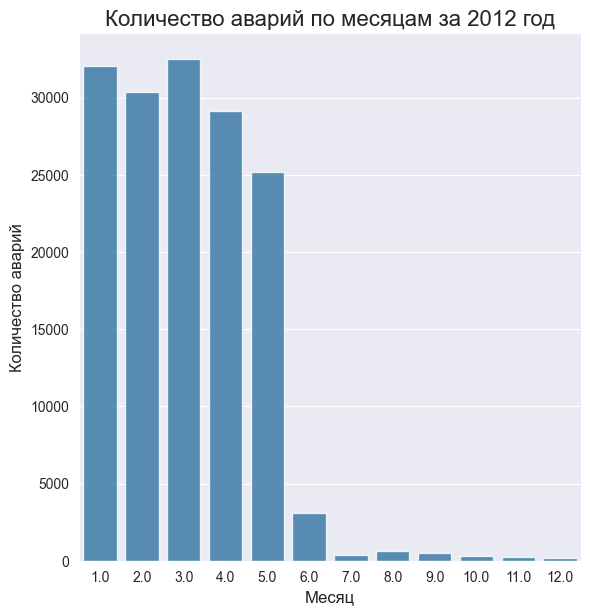

In [11]:
g_2012 = sns.catplot(data=collisions_count, x='month', y='count', kind='bar', alpha=.8, height=6)
plt.title('Количество аварий по месяцам за 2012 год', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество аварий', fontsize=12)
plt.show();

Наибольшее количество аварий происходит с января по май месяц. 
Данный график не внушает доверия, так как с июля по декабрь количество аварий практически приблизилось к нулю, хотя первые месяцы превышало 20_000. Такого не может быть. Могли бы присутствовать какие-то всплески - падения, но не такой огромный перекос в данных. 
При этом смотрел на другие года в данных, там нет такого перекоса. 

In [12]:
# Посмотрю на эти данные за весь период наблюдений 
q = '''
SELECT EXTRACT(YEAR FROM CAST(c.collision_date as date)) as year, 
       EXTRACT(MONTH FROM CAST(c.collision_date as date)) as month, 
       COUNT(case_id)
FROM collisions c
WHERE collision_damage != 'scratch'
GROUP BY year, month;
'''

all_collisions = pd.read_sql_query(q, connection)

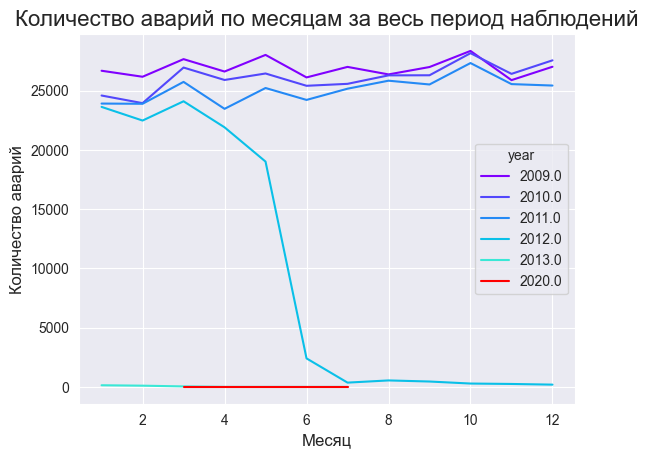

In [13]:
sns.lineplot(data=all_collisions, x='month', y='count', hue='year', palette='rainbow')
plt.title('Количество аварий по месяцам за весь период наблюдений', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество аварий', fontsize=12)
plt.show();

На графике видно, что распределение аварийности по предыдущим годам равномерное с небольшими органичными подъемами и спадами. Но с середины 2012 явно отсутствуют данные и в 2013 года эта картина продолжается.   

#### Подготовка к совещанию.

#### Задания к совещанию. 
1. Определить количество происшествий на перекрестках с неработающими светофорами, в которых пострадали пешеходы. 
2. Выяснить максимальную сумму страховки в зависимости от серьезности происшествия (COLLISION_DAMAGE). 
3. Выявить количество аварий в ночное время (с 21:00 до 6:00) с заснувшими водителями (PRIMARY_COLL_FACTOR). 
4. Установить количество происшествий с водителями в состоянии алкогольного опьянения в зависимости от района. 
5. Установить количество происшествий из-за плохого состояния дорожного покрытия (ямы, глубокая колея) в зависимости от района.
6. Количество аварий на мокрой или скользкой дороге (ROAD_SURFACE Wet Slippery)с автомобилями с автоматической коробкой передач.  

### Алгоритмы решения. 
**Задание № 2.**
Выяснить сумму страховки в зависимости от серьезности происшествия (COLLISION_DAMAGE). 
- выполнить группировку по типу серьезности происшествия;
- найти суммы страховок;
- объединить таблицы;
- вывести сумму в зависимости от типа происшествия. 

**Задание № 4.** 
Установить количество происшествий с водителями в состоянии алкогольного опьянения в зависимости от района. 
- отобрать водителей в состоянии алкогольного опьянения; 
- выполнить группировку по районам и по месяцам. 
- объединить таблицы;
- посчитать количество. 

In [14]:
# Задание № 2
q = '''
SELECT c.collision_damage, SUM(p.insurance_premium)
FROM collisions c JOIN parties p ON c.case_id = p.case_id
WHERE EXTRACT(YEAR FROM CAST(c.collision_date as date)) = 2012
GROUP BY c.collision_damage;
'''

insurance = pd.read_sql_query(q, connection)
insurance

,collision_damage,sum
0,fatal,188008
1,middle damage,1194569
2,scratch,3062557
3,severe damage,222668
4,small damage,5516703


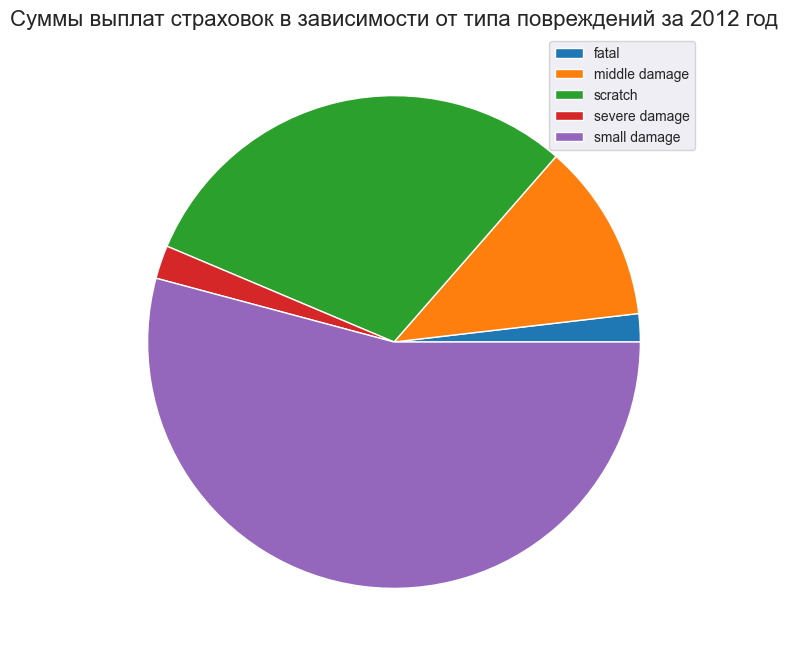

In [15]:
labels = insurance.collision_damage.tolist()
plt.figure(figsize=(12,8))
plt.pie(insurance['sum'])
plt.title('Суммы выплат страховок в зависимости от типа повреждений за 2012 год', 
          fontsize=16)
plt.legend(labels=labels)
plt.show()

Больше половины сумм выплат приходится на малые повреждения. На втором месте находятся выплаты по царапинам. Меньше всего выплачивается по случаям, с не подлежащими восстановлению автомобилями. 

In [16]:
# Задание № 4
q = '''
WITH alc AS (SELECT case_id
             FROM parties
             WHERE party_sobriety LIKE 'had been%')

SELECT county_location, COUNT(*)
FROM collisions c JOIN alc a ON c.case_id = a.case_id
WHERE EXTRACT(YEAR FROM CAST(collision_date as date)) = 2012
GROUP BY county_location
'''

res = pd.read_sql_query(q, connection)
res.sort_values(by='count', ascending=False)

,county_location,count
18,los angeles,4489
29,orange,1555
36,san diego,1235
32,riverside,972
35,san bernardino,914
33,sacramento,649
0,alameda,558
42,santa clara,549
14,kern,475
55,ventura,391


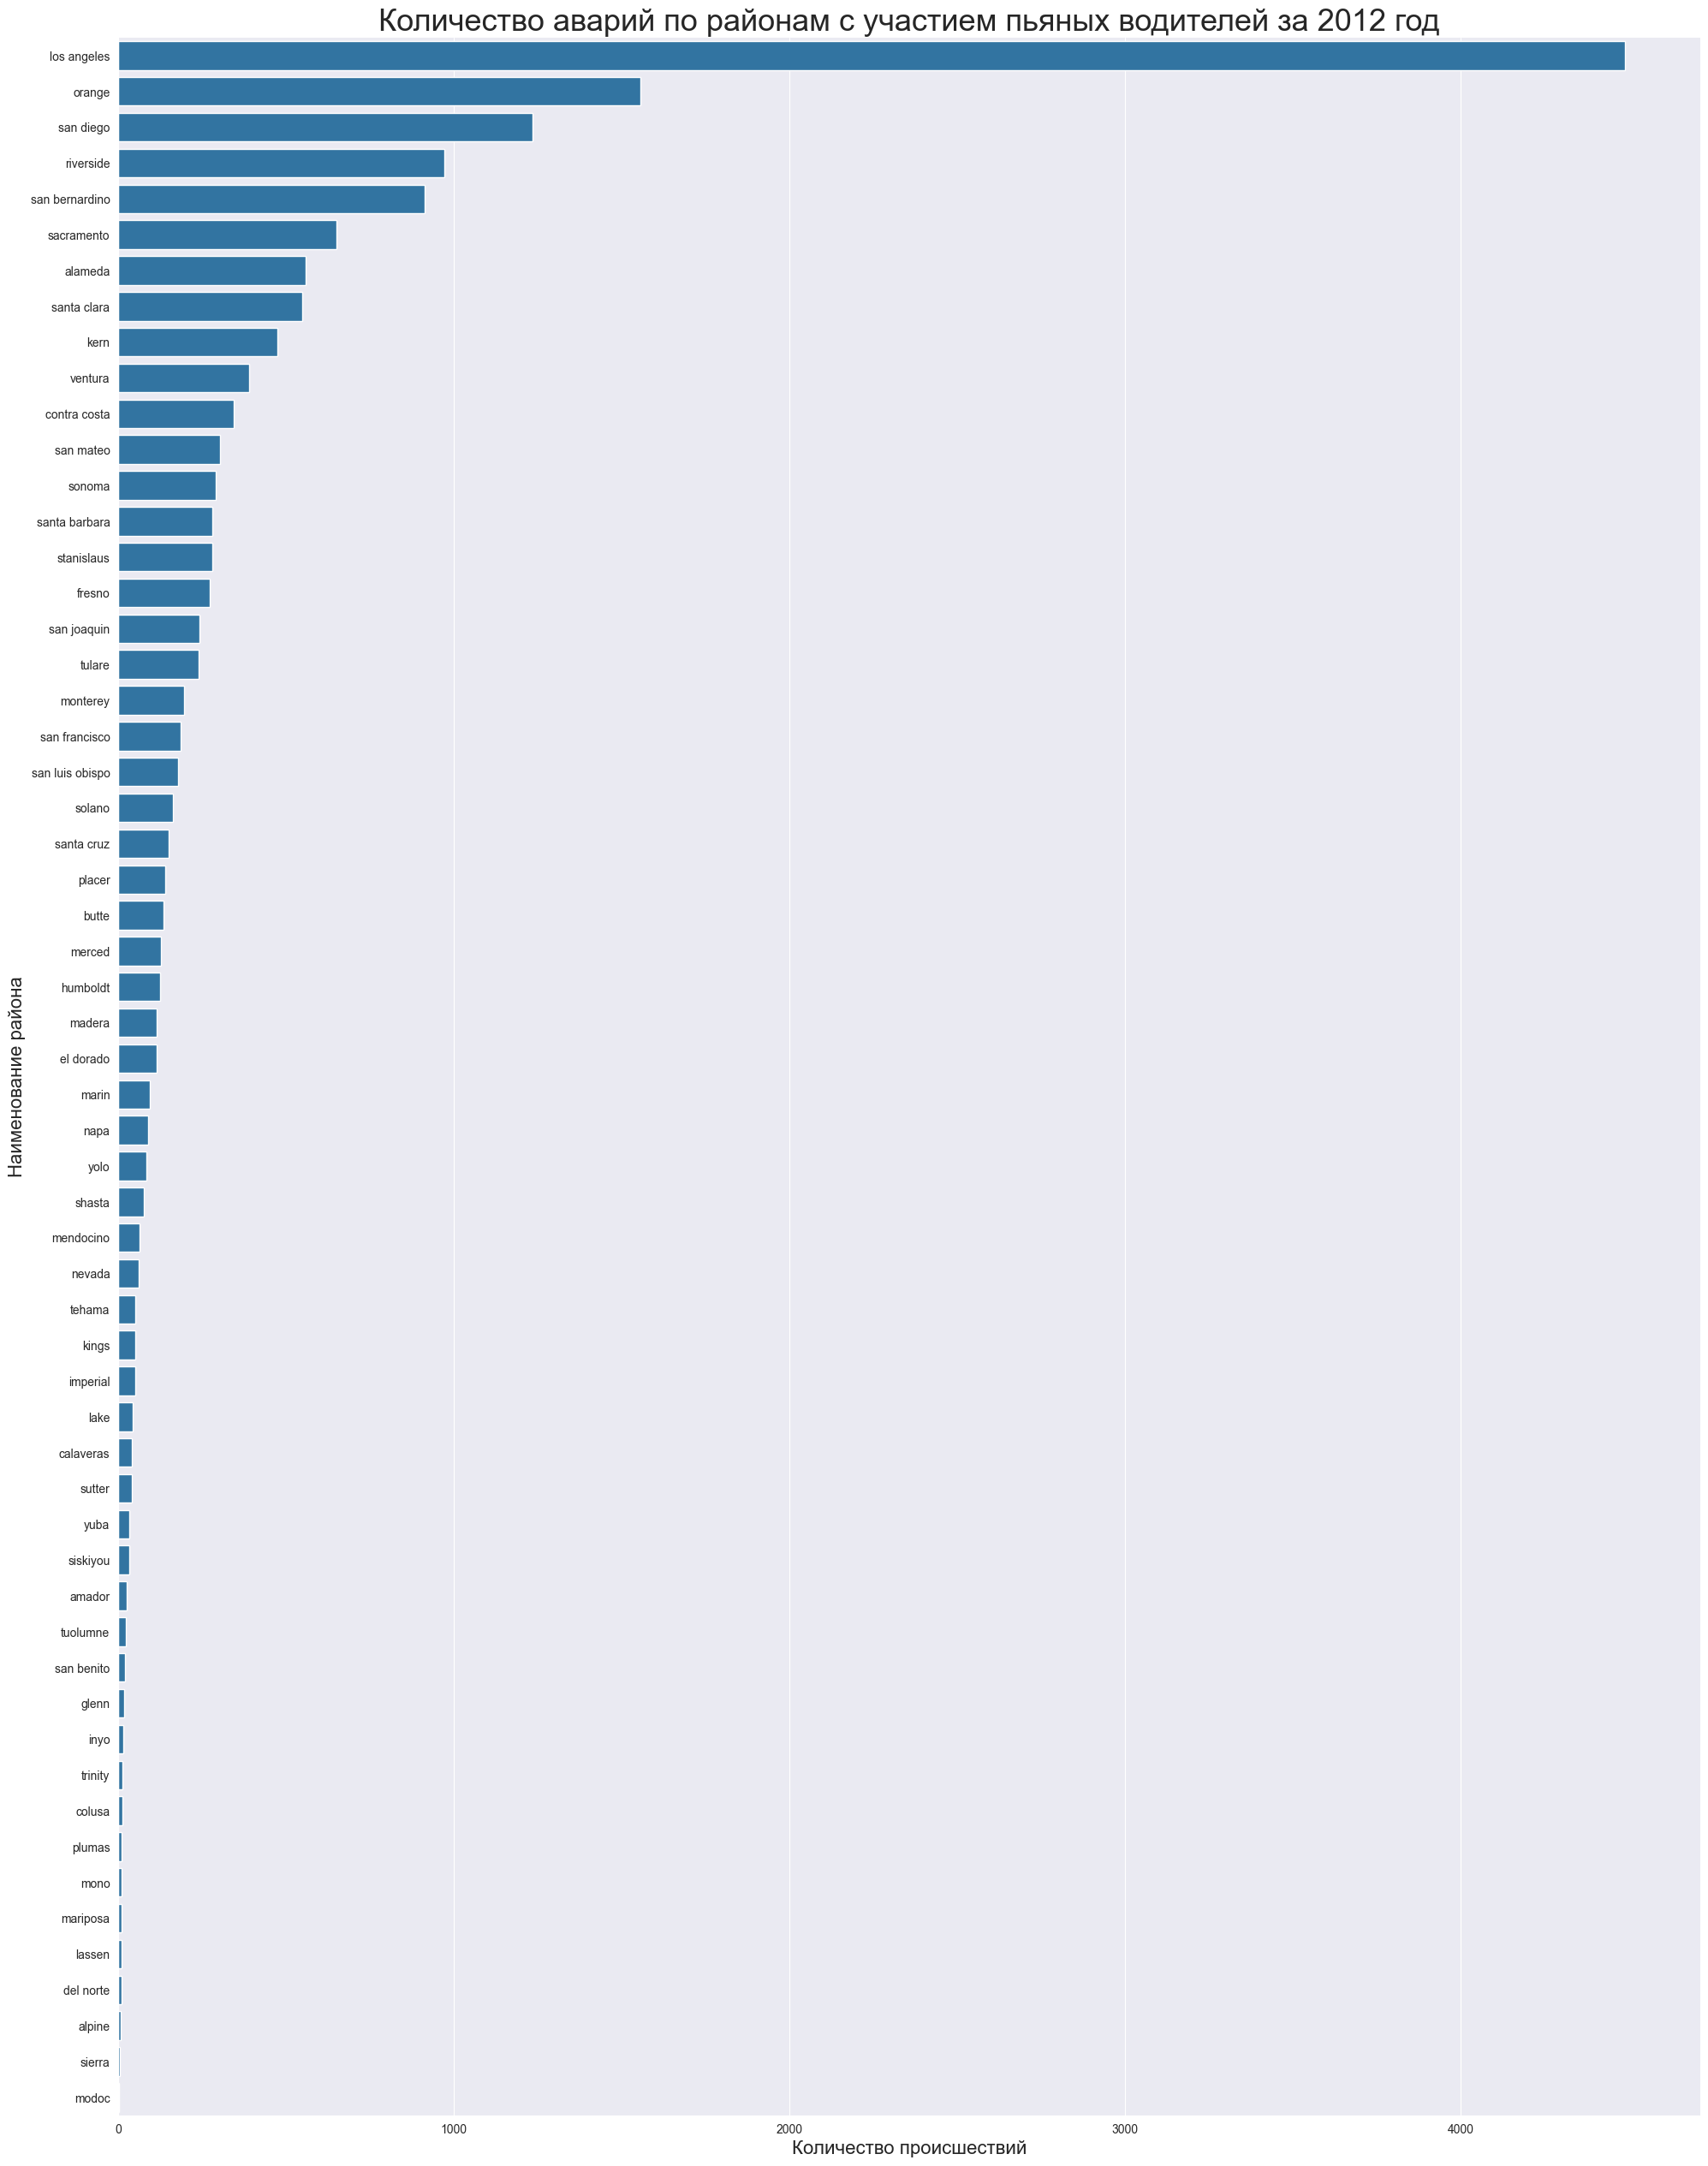

In [17]:
g_res = sns.catplot(data=res.sort_values(by='count', ascending=False), 
                    y='county_location', x='count',
                    kind='bar', height=25, aspect=.8)
plt.title('Количество аварий по районам с участием пьяных водителей за 2012 год',
          fontsize=26)
plt.xlabel('Количество происшествий', fontsize=16)
plt.ylabel('Наименование района', fontsize=16)
plt.show();

В соответствии со статистическими данными в районах Лос-Анджелес, Оранже и Сан Диего наиболее часто происходят аварии с участием пьяных водителей. 

[К оглавлению](#section_0)
<a id='section_5'></a>
# Модель для оценки водительского риска

In [18]:
# Выгружу необходимые, с моей точки зрения, данные для дальнейшей работы. 
q = '''
SELECT c.collision_date, c.collision_time, c.intersection, 
       c.direction, c.weather_1, c.road_surface, 
       c.lighting, c.county_location, c.location_type, c.road_condition_1, 
       c.control_device, p.at_fault, p.party_drug_physical, 
       p.party_sobriety, p.cellphone_in_use, 
       v.vehicle_type, v.vehicle_transmission, v.vehicle_age
FROM parties p 
JOIN collisions c ON p.case_id = c.case_id
JOIN vehicles v ON p.case_id = v.case_id AND p.party_number = v.party_number
WHERE party_type = 'car'
    AND EXTRACT(YEAR FROM CAST(collision_date as date)) = 2012
    AND c.collision_damage != 'scratch';

'''

df_from_db = pd.read_sql_query(q, connection)

In [19]:
# Закрою соединение с базой, так как далее оно мне не нужно. 
if connection:
    connection.close()
    print("Соединение с PostgreSQL закрыто")

Соединение с PostgreSQL закрыто


Касательно выбора колонок. Не стал включать сюда те данные, которые являются последствием аварии, так как они никак не влияют на вероятность ее происшествия. 
Включил: 
- c.collision_date, c.collision_time - так как и дата и время могут оказывать влияние на состояние водителя;  
- c.intersection - место происшествия, при неработящем или неправильно работающем светофоре перекресток будет потенциальным местом аварий;
- c.weather_1 - погодные условия всегда и очень сильно оказывают влияние на аварийную ситуацию на дорогах; 
- c.road_surface, c.lighting, c.road_condition_1 - состояние дорожного покрытия и его освещенность также могут оказаться причиной аварии;
- c.county_location - как показал пример выше - в зависимости от района изменяется количество пьяных водителей. Также я уверен, что и состояние дорожного покрытия может сильно зависеть от района.  
- c.location_type - может оказывать влияние. Не уверен, посмотрю на поведение модели с этим признаком; 
- c.control_device - неработающий светофор на перекрестке может оказаться причиной аварии; 
- p.at_fault  - ключевой признак; 
- p.party_drug_physical, p.party_sobriety - человек под воздействием алкоголя либо каких-то препаратов может оказаться не в состоянии управлять транспортным средством, иногда замедляется реакция или появляется рассеянность внимания от употребления некоторых медикаментозных препаратов, эти признаки явно могут оказывать влияние на аварийность;
- p.cellphone_in_use - отсутствие громкой связи в машине может привести к занятости одной руки телефоном и послужить причиной аварии; 
- v.vehicle_type, v.vehicle_transmission - определенные слои населения могут предпочитать машины одной марки(типа кузова) ввиду их ценовой доступности; 
- v.vehicle_age - по требованию заказчика. 

In [20]:
# Сохраню датасет для дальнейшей работы. 
df_from_db.to_csv('datasets/collisions.csv', index=False)

In [21]:
# df = df_from_db.copy()

In [22]:
df = pd.read_csv('datasets/collisions.csv')

In [23]:
get_data_info(df)

,collision_date,collision_time,intersection,direction,weather_1,road_surface,lighting,county_location,location_type,road_condition_1,control_device,at_fault,party_drug_physical,party_sobriety,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
49229,2012-06-01,00:01:00,0.0000,east,clear,dry,dark with no street lights,santa clara,NaN,normal,none,0,NaN,had not been drinking,0.0000,coupe,auto,6.0000
45614,2012-01-06,10:50:00,1.0000,NaN,clear,dry,daylight,san bernardino,NaN,normal,functioning,1,NaN,had not been drinking,0.0000,sedan,manual,5.0000
42263,2012-03-23,20:30:00,0.0000,east,clear,dry,dark with street lights,riverside,NaN,normal,functioning,1,NaN,had not been drinking,0.0000,sedan,manual,1.0000
6380,2012-02-01,07:57:00,0.0000,north,clear,dry,daylight,los angeles,highway,normal,none,0,NaN,had not been drinking,0.0000,sedan,manual,NaN
25566,2012-03-14,15:50:00,0.0000,east,raining,wet,daylight,alameda,NaN,normal,functioning,0,NaN,had not been drinking,0.0000,sedan,manual,1.0000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   collision_date        56248 non-null  object 
 1   collision_time        56160 non-null  object 
 2   intersection          56073 non-null  float64
 3   direction             43230 non-null  object 
 4   weather_1             56080 non-null  object 
 5   road_surface          55900 non-null  object 
 6   lighting              56094 non-null  object 
 7   county_location       56248 non-null  object 
 8   location_type         25932 non-null  object 
 9   road_condition_1      55999 non-null  object 
 10  control_device        56033 non-null  object 
 11  at_fault              56248 non-null  int64  
 12  party_drug_physical   2857 non-null   object 
 13  party_sobriety        55376 non-null  object 
 14  cellphone_in_use      51777 non-null  float64
 15  vehicle_type       

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
collision_date,56248,366,2012-03-17,571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collision_time,56160,1435,15:00:00,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intersection,56_073.0000,NaN,NaN,NaN,0.2215,0.4153,0.0000,0.0000,0.0000,0.0000,1.0000
direction,43230,4,north,12129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_1,56080,7,clear,45092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_surface,55900,4,dry,50242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lighting,56094,5,daylight,38064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_location,56248,58,los angeles,16236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,25932,3,highway,21323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_condition_1,55999,8,normal,54066,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество пропусков в данных: 
party_drug_physical     53391
location_type           30316
direction               13018
cellphone_in_use         4471
vehicle_age              1694
party_sobriety            872
vehicle_transmission      859
road_surface              348
road_condition_1          249
control_device            215
intersection              175
weather_1                 168
lighting                  154
collision_time             88
at_fault                    0
county_location             0
vehicle_type                0
collision_date              0
dtype: int64
Кол-во дубликатов в данных = 129


В полученных данных присутствуют дубликаты. 
В признаках party_drug_physical и location_type очень много пропусков. Заполнить их не представляется возможным. 
Удалю дубликаты и эти признаки.

In [24]:
df.drop(['location_type', 'party_drug_physical'], axis=1, inplace=True, errors='ignore')
df.drop_duplicates(inplace=True)

In [25]:
# Посмотрю на значения года авто. 
df.vehicle_age.value_counts()

3.0000      10980
4.0000       7138
2.0000       6030
5.0000       5554
6.0000       3930
7.0000       3834
8.0000       3501
0.0000       3081
9.0000       2765
1.0000       2541
10.0000      1939
11.0000      1377
12.0000       879
13.0000       551
14.0000       282
15.0000        37
16.0000         6
17.0000         3
161.0000        2
19.0000         1
Name: vehicle_age, dtype: int64

In [26]:
# Удалю строки с годом авто == 161 году. Так как 2012 - 161 = 1851. А по историческим данным первый авто был выпущен в 1886 году. ))) 
df = df[~(df.vehicle_age == 161)]

Заполню пропуски: 
- в типе коробки передач наиболее часто встречающимся в зависимости от типа кузова; 
- в годе авто наиболее часто встречающимся в зависимости от типа кузова и коробки передач; 
- в колонке использования телефона - наиболее часто встречающимся в зависимости от типа кузова, коробки передач и года авто; 
- в колонке светофораб перекрестка, качества дорожного покрытия и состояния водителя - от района, 
- погоду - наиболее часто всстречающимся значениме в этой колонке; 
- состояние дорожного покрытия - в зависимости от погоды; 
- время происшествия - наиболее часто встречающимся значениме в зависимости от дня и района, 
- освещенность - в зависимости от времени происшествия и района; 
- направление движения - в зависимости от района. 

In [27]:
df = df.fillna({
    'vehicle_transmission': df.groupby('vehicle_type').vehicle_transmission.apply(pd.Series.mode)[1],
    'vehicle_age': df.groupby(['vehicle_type', 'vehicle_transmission']).vehicle_age.apply(pd.Series.mode)[1],
    'cellphone_in_use': df.groupby(['vehicle_type', 'vehicle_transmission', 'vehicle_age']).cellphone_in_use.apply(pd.Series.mode)[1],
    'control_device': df.groupby('county_location').control_device.apply(pd.Series.mode)[1],
    'intersection': df.groupby('county_location').intersection.apply(pd.Series.mode)[1],
    'road_condition_1': df.groupby('county_location').road_condition_1.apply(pd.Series.mode)[1], 
    'party_sobriety': df.groupby('county_location').party_sobriety.apply(pd.Series.mode)[1],
    'weather_1': df.weather_1.mode()[0],
    'road_surface': df.groupby('weather_1').road_surface.apply(pd.Series.mode)[1],
    'collision_time': df.groupby(['collision_date', 'county_location']).collision_time.apply(pd.Series.mode)[1],
    'lighting': df.groupby(['collision_time', 'county_location']).lighting.apply(pd.Series.mode)[1],
    'direction': df.groupby('county_location').direction.apply(pd.Series.mode)[1],
})

In [28]:
# Проверю наличие пропусков после заполнения. 
df.isna().sum().sort_values(ascending=False)

collision_date          0
collision_time          0
intersection            0
direction               0
weather_1               0
road_surface            0
lighting                0
county_location         0
road_condition_1        0
control_device          0
at_fault                0
party_sobriety          0
cellphone_in_use        0
vehicle_type            0
vehicle_transmission    0
vehicle_age             0
dtype: int64

In [29]:
# Изменю значения признака состояния водителя, был или не был пьян.  
df.party_sobriety = df.party_sobriety.transform(
    lambda x: 1 if x in [
        'had been drinking, under influence',
        'had been drinking',
        'had been drinking, not under influence', 
        'had been drinking, impairment unknown', 
        'impairment unknown'
    ] else x    
)
df.party_sobriety = df.party_sobriety.transform(
    lambda x: 0 if x in [
        'had not been drinking',
        'not applicable' # так как обычно оценка не производится при явно трезвом состоянии. 
    ] else x
)

In [30]:
# Трансфомирую дату и время. Дату разделю на рабочие и выходные дни, а время на утро, день, вечер и ночь. Колонки с датой и временем удалю.   
df['collision_date'] = pd.to_datetime(df['collision_date'], format='%Y-%m-%d')
df['collision_time'] = pd.to_datetime(
    df['collision_time'], infer_datetime_format=True).dt.time
df['weekday'] = pd.to_datetime(df['collision_date']).dt.dayofweek
df.weekday = df.weekday.apply(lambda x: 'weekend' if x in [5, 6] else 'workday')

In [31]:
def get_time(x):
    if dt.time(hour=6, minute=0) < x <= dt.time(hour=12, minute=0):
        return 'morning'
    elif dt.time(hour=12, minute=0) < x <= dt.time(hour=18, minute=0):
        return 'daytime'
    elif dt.time(hour=18, minute=0) < x <= dt.time(hour=22, minute=0):
        return 'evening'
    else:
        return 'night'

df['day_time'] = df.collision_time.apply(get_time)

In [32]:
df.drop(['collision_date', 'collision_time'], axis=1, inplace=True)

In [33]:
# Удалю появившиеся дубликаты
df.drop_duplicates(inplace=True)

In [34]:
# Сгруппирую районы по количеству произошедших ДТП. 
district = df.groupby('county_location').county_location.count()

In [35]:
def get_distinct(x):
    if district[x] > 6_000:
        return x
    elif 6_000 > district[x] > 3_000:
        return 'large area'
    elif 3_000 > district[x] > 1_000:
        return 'middle area'
    else:
        return 'small area'

In [36]:
# Сгруппирую районы
df.county_location = df.county_location.transform(get_distinct)
df.county_location.value_counts()

small area     14453
middle area    13154
los angeles     8414
large area      6890
Name: county_location, dtype: int64

In [37]:
# Изменю типы данных
df[['intersection', 'cellphone_in_use', 'vehicle_age']] = df[[
    'intersection', 'cellphone_in_use', 'vehicle_age']].astype('int')
df[[
    'intersection', 'direction', 'weather_1', 'road_surface',
    'lighting', 'county_location', 'road_condition_1', 'control_device',
    'at_fault', 'party_sobriety', 'cellphone_in_use',
    'vehicle_type', 'vehicle_transmission', 'weekday', 'day_time'
]] = df[[
    'intersection', 'direction', 'weather_1', 'road_surface',
    'lighting', 'county_location', 'road_condition_1', 'control_device',
    'at_fault', 'party_sobriety', 'cellphone_in_use',  
    'vehicle_type', 'vehicle_transmission', 'weekday', 'day_time']].astype('category')
df.vehicle_age = df.vehicle_age.astype('int')

In [38]:
# Проверю наличие дубликатов после заполнения пропусков. 
df.duplicated().sum()

9728

In [39]:
# Удалю появившиеся дубликаты
df.drop_duplicates(inplace=True)

In [40]:
# Посмотрю на распределение целевого признака.  
df.at_fault.value_counts(normalize=True)

1   0.5361
0   0.4639
Name: at_fault, dtype: float64

Распределение равномерное, почти пополам. 

interval columns not set, guessing: ['vehicle_age']


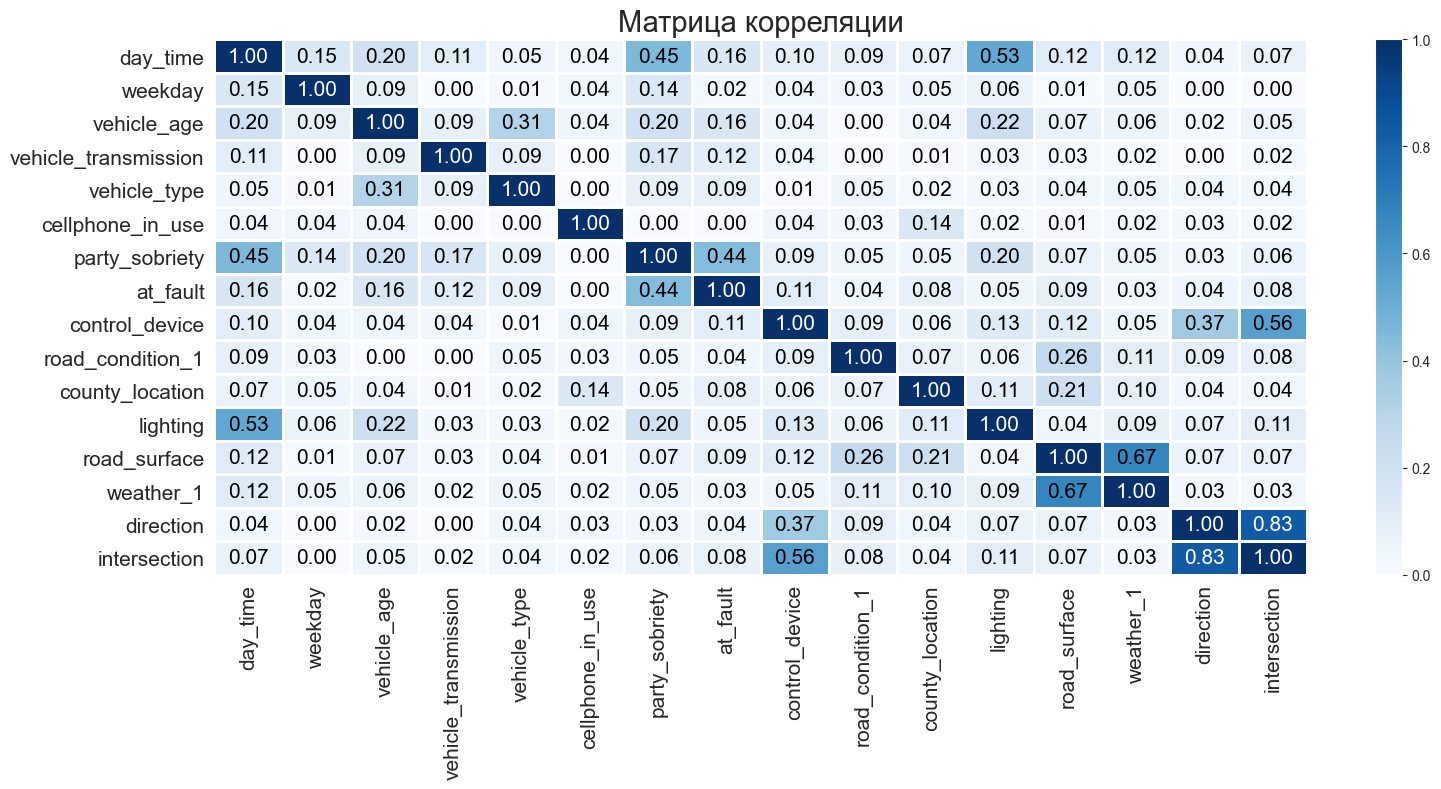

In [41]:
# посмотрю на матрицу корреляции признаков. 
ph_view = df.phik_matrix()
plot_correlation_matrix(ph_view.values,
                        x_labels=ph_view.columns,
                        y_labels=ph_view.index,
                        vmin=0, vmax=1, color_map='Blues',
                        title='Матрица корреляции',
                        fontsize_factor=1.5,
                        identity_layout=True,
                        figsize=(16, 8))
plt.tight_layout()

По показаниям матрицы алкогольное опьянение является самым влиятельным признаком ДТП. Также наблюдается мультиколлинеарность между признаками перекрестка и направления движения.  

[К оглавлению](#section_0)
<a id='section_6'></a>
# Поиск лучшей модели

In [42]:
# Разделю на тренировочную и тестовую выборки
train_df, test_df = df_split(df, train_size=0.75)

In [43]:
# Посмотрю, что получилось
print(train_df.shape)
print(test_df.shape)

(24887, 16)
(8296, 16)


In [44]:
# Выделю целевой признак на тренировочной выборке и разделю на тренировочную и валидационную выборки. 
X_train = train_df.drop('at_fault', axis=1)
y_train = train_df.at_fault

# Выделю таргет на тестовой выборке. 
X_test = test_df.drop('at_fault', axis=1)
y_test = test_df.at_fault

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24887, 15) (24887,)
(8296, 15) (8296,)


In [46]:
cat_features = X_train.select_dtypes(include='category').columns.tolist()

In [90]:
# Подготовлю пайплайн для преобразования данных. 
col_trans_lr = make_column_transformer(
    (BinaryEncoder(), make_column_selector(dtype_include='category')),
    (StandardScaler(), make_column_selector(dtype_exclude='category')),
    remainder='passthrough', n_jobs=-1, verbose=False,
)

col_trans_rf = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',
                    unknown_value=123456), 
     make_column_selector(dtype_include='category')),
    remainder='passthrough', n_jobs=-1, verbose=False,
)

col_trans_cb = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_exclude='category')),
    remainder='passthrough', n_jobs=-1, verbose=False,
)

col_trans_xgb = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',
                    unknown_value=123456),
     make_column_selector(dtype_include='category')),
    (StandardScaler(), make_column_selector(dtype_exclude='category')),
    remainder='passthrough', n_jobs=-1, verbose=False,
)

In [48]:
# Получу нормальные наименования колонок после работы pipeline
def get_col_name(pipe) -> list:
    column_name = pd.DataFrame(pipe.get_feature_names_out())
    column_name = column_name[0].apply(lambda x: x.split('__'))
    column_name = column_name.apply(lambda x: x[1]).tolist()
    return column_name

In [91]:
# Подготовлю данные для моделей. 
X_train_rf = pd.DataFrame(col_trans_rf.fit_transform(X_train))
X_train_rf.columns = get_col_name(col_trans_rf)
X_train_lr = pd.DataFrame(col_trans_lr.fit_transform(X_train))
X_train_lr.columns = get_col_name(col_trans_lr)
X_train_cb = pd.DataFrame(col_trans_cb.fit_transform(X_train))
X_train_cb.columns = get_col_name(col_trans_cb)
X_train_xgb = pd.DataFrame(col_trans_xgb.fit_transform(X_train))
X_train_xgb.columns = get_col_name(col_trans_xgb)

In [50]:
# Словарь для сбора итоговых показателей
result = dict()

In [51]:
# Ограничу логирование при подборе гиперпараметров
optuna.logging.set_verbosity(30)

In [52]:
# модель RandomForestClassifier
def fit_rf(trial, train, val):
    X_train_, y_train_ = train
    X_val_, y_val_ = val

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1500),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 2, 16),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 1, 10_000),
    }

    clf = RandomForestClassifier(
        **param,
        random_state=RANDOM_STATE,
        verbose=False,
        n_jobs=-1
    )

    clf.fit(X_train_, y_train_)
    return clf, clf.predict(X_val_)

In [53]:
def objective(trial, return_models=False):
    n_splits = 3
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

    scores, models = [], []

    for train_idx, valid_idx in kf.split(X_train_rf):
        train_data = X_train_rf.iloc[train_idx, :], y_train.iloc[train_idx]
        valid_data = X_train_rf.iloc[valid_idx, :], y_train.iloc[valid_idx]

        model, y_pred = fit_rf(trial, train_data, valid_data)
        scores.append(f1_score(y_pred, valid_data[1], average='binary'))
        models.append(model)

    result = np.mean(scores)
    
    if return_models:
        return result, models
    else:
        return np.mean(scores)

study_rf = optuna.create_study(study_name='RF', 
                                direction="maximize",
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))

study_rf.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)
model_rf = RandomForestClassifier(**study_rf.best_trial.params)
result[study_rf.study_name] = study_rf.best_value 

  0%|          | 0/100 [00:00<?, ?it/s]

Удаление неинформативных признаков не дало улучшения метрики. 

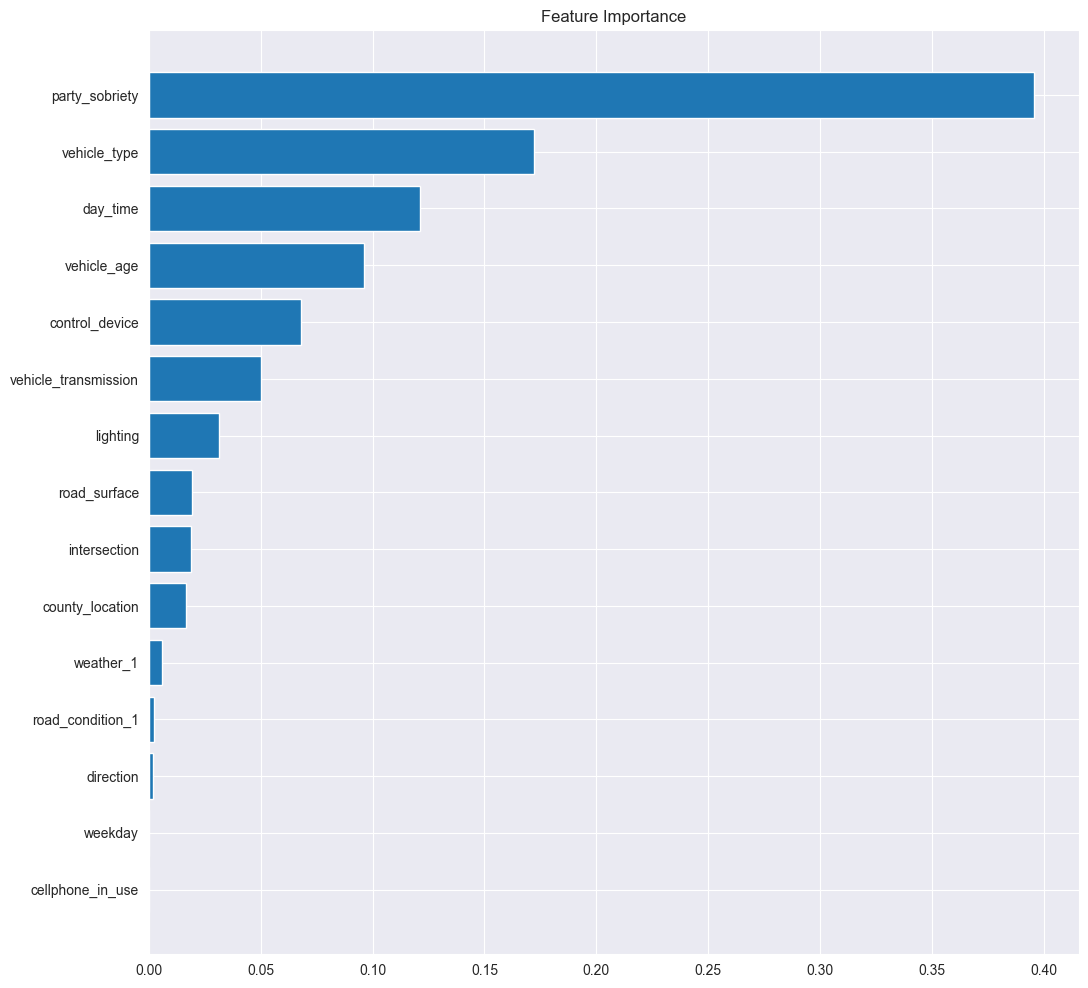

In [54]:
# Посмотрю на важность признаков для модели случайного леса. 
model_rf.fit(X_train_rf, y_train)

feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train_rf.columns)[sorted_idx])
plt.title('Feature Importance');

In [55]:
# модель LogisticRegression
def fit_lr(trial, train, val):
    X_train_, y_train_ = train
    X_val_, y_val_ = val

    param = {
        'C': trial.suggest_float('C', 0.01, 99),
        'tol': trial.suggest_float('tol', 0.0001, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2'])
    }

    if param['penalty'] == 'l2': 
        param['solver'] = 'newton-cholesky'
    elif param['penalty'] == 'l1':
        param['solver'] = 'liblinear'
    
    clf = LogisticRegression(
        **param,
        random_state=RANDOM_STATE,
        multi_class='ovr',
        warm_start=True,
        class_weight='balanced',
        verbose=0,
        n_jobs=-1
    )

    clf.fit(X_train_, y_train_)
    return clf, clf.predict(X_val_)

In [56]:
def objective(trial, return_models=False):
    n_splits = 3
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

    scores, models = [], []

    for train_idx, valid_idx in kf.split(X_train_rf):
        train_data = X_train_rf.iloc[train_idx, :], y_train.iloc[train_idx]
        valid_data = X_train_rf.iloc[valid_idx, :], y_train.iloc[valid_idx]

        model, y_pred = fit_lr(trial, train_data, valid_data)
        scores.append(f1_score(y_pred, valid_data[1], average='binary'))
        models.append(model)

    result = np.mean(scores)

    if return_models:
        return result, models
    else:
        return np.mean(scores)

study_lr = optuna.create_study(study_name='LR',
                               direction="maximize",
                               pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
                               )
study_lr.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)
model_lr = LogisticRegression(**study_lr.best_trial.params)
result[study_lr.study_name] = study_lr.best_value

  0%|          | 0/100 [00:00<?, ?it/s]

In [57]:
def fit_catboost(trial, train_, val_):
    X_train_, y_train_ = train_
    X_val_, y_val_ = val_
    
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.01),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 2, 50),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.8),
        "depth": trial.suggest_int("depth", 3, 16),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 128, 1024),
        "max_bin": trial.suggest_int("max_bin", 128, 1024),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    clf = CatBoostClassifier(
        **param,
        thread_count=-1,
        random_seed=RANDOM_STATE,
        cat_features=cat_features,
        used_ram_limit="16gb",
        eval_metric="F1",
        use_best_model=True,
    )

    pruning_callback = CatBoostPruningCallback(trial, 'F1')

    clf.fit(X_train_, y_train_,
            eval_set=(X_val_, y_val_),
            verbose=0,
            plot=False,
            early_stopping_rounds=50,
            callbacks=[pruning_callback],
            )

    pruning_callback.check_pruned()

    y_pred = clf.predict(X_val_)
    return clf, y_pred

In [58]:
def objective(trial, return_models=False):
    n_splits = 3
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

    scores, models = [], []

    for train_idx, valid_idx in kf.split(X_train_cb):
        train_data = X_train_cb.iloc[train_idx], y_train.iloc[train_idx]
        valid_data = X_train_cb.iloc[valid_idx], y_train.iloc[valid_idx]

        model, y_pred = fit_catboost(trial, train_data, valid_data)
        scores.append(f1_score(y_pred, valid_data[1], average='binary'))
        models.append(model)

    result = np.mean(scores)

    if return_models:
        return result, models
    else:
        return result

In [59]:
study_cb = optuna.create_study(study_name='CatBoost', direction="maximize")
study_cb.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)
model_cb = CatBoostClassifier(**study_cb.best_trial.params, cat_features=cat_features)
result[study_cb.study_name] = study_cb.best_value

  0%|          | 0/100 [00:00<?, ?it/s]

In [87]:
def fit_xgb(trial, train_, val_):
    X_train_, y_train_ = train_
    X_val_, y_val_ = val_

    param = {
        'booster': trial.suggest_categorical('booster', ['dart', 'gbtree']),
        'eta': trial.suggest_float('eta', 0.0001, 0.01),
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'num_boosting_rounds': trial.suggest_int('num_boosting_rounds', 10, 1000), 
        'lambda': trial.suggest_int('lambda', 1, 50),
    }

    if param['booster'] == 'dart':
        param['rate_drop'] = trial.suggest_float('rate_drop', 0, 1)
        param['one_drop'] = 1

    clf = XGBClassifier(**param,
                        seed=RANDOM_STATE,
                        verbose_eval=10,
                        enable_categorical=True, 
                        )
    
    clf.fit(X_train_, y_train_,
            eval_set=[(X_val_, y_val_)],
            early_stopping_rounds=50,
            )

    y_pred = clf.predict(X_val_)
    return clf, y_pred

In [105]:
def objective(trial, return_models=False):
    n_splits = 3
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

    scores, models = [], []

    for train_idx, valid_idx in kf.split(X_train_xgb):
        train_data = X_train_xgb.iloc[train_idx], y_train.iloc[train_idx]
        valid_data = X_train_xgb.iloc[valid_idx], y_train.iloc[valid_idx]

        model, y_pred = fit_xgb(trial, train_data, valid_data)
        scores.append(f1_score(y_pred, valid_data[1], average='binary'))
        models.append(model)

    result = np.mean(scores)

    if return_models:
        return result, models
    else:
        return result

study_xgb = optuna.create_study(study_name='XGBClassifier', direction="maximize")

study_xgb.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)
model_xgb = XGBClassifier(**study_xgb.best_trial.params)
result[study_xgb.study_name] = study_xgb.best_value

  0%|          | 0/100 [00:00<?, ?it/s]

[0]	validation_0-logloss:0.69065[0]	validation_0-logloss:0.69061

[1]	validation_0-logloss:0.69052
[0]	validation_0-logloss:0.69040
[1]	validation_0-logloss:0.69061
[0]	validation_0-logloss:0.69062
[2]	validation_0-logloss:0.69044
[2]	validation_0-logloss:0.69057
[0]	validation_0-logloss:0.69032[0]	validation_0-logloss:0.69024

[1]	validation_0-logloss:0.69055
[0]	validation_0-logloss:0.69064[0]	validation_0-logloss:0.69007
[1]	validation_0-logloss:0.69011

[3]	validation_0-logloss:0.69053[1]	validation_0-logloss:0.68995
[0]	validation_0-logloss:0.69062

[0]	validation_0-logloss:0.69001
[3]	validation_0-logloss:0.69036
[0]	validation_0-logloss:0.68968
[0]	validation_0-logloss:0.68982
[0]	validation_0-logloss:0.68991
[0]	validation_0-logloss:0.68997
[0]	validation_0-logloss:0.68961
[2]	validation_0-logloss:0.69051
[0]	validation_0-logloss:0.69015[2]	validation_0-logloss:0.68983
[1]	validation_0-logloss:0.68980[2]	validation_0-logloss:0.68959


[1]	validation_0-logloss:0.69060
[1]	valida

In [106]:
result_df = pd.DataFrame(data=result.items(), columns=['model', 'F1-score'])
print(result_df)

           model  F1-score
0             RF    0.6728
1             LR    0.5789
2       CatBoost    0.7014
3  XGBClassifier    0.7021


Лучший показатель метрики получился у модели XGBClassifier. Далее буду работать с ней. 

[К оглавлению](#section_0)
<a id='section_7'></a>
# Проверка лучшей модели

In [107]:
# Обучу модель и получу предсказания на тестовых данных.  
model_xgb.fit(X_train_xgb, y_train, verbose=0)
X_test_xgb = col_trans_xgb.transform(X_test)
pred = model_xgb.predict(X_test_xgb)
# Посмотрю на целевую метрику на тестовых данных. 
f1 = f1_score(pred, y_test)
f1  

0.6977168949771689

In [108]:
# Построю матрицу ошибок
matrix = confusion_matrix(y_test, pred)
matrix

array([[ 453, 3426],
       [ 215, 4202]], dtype=int64)

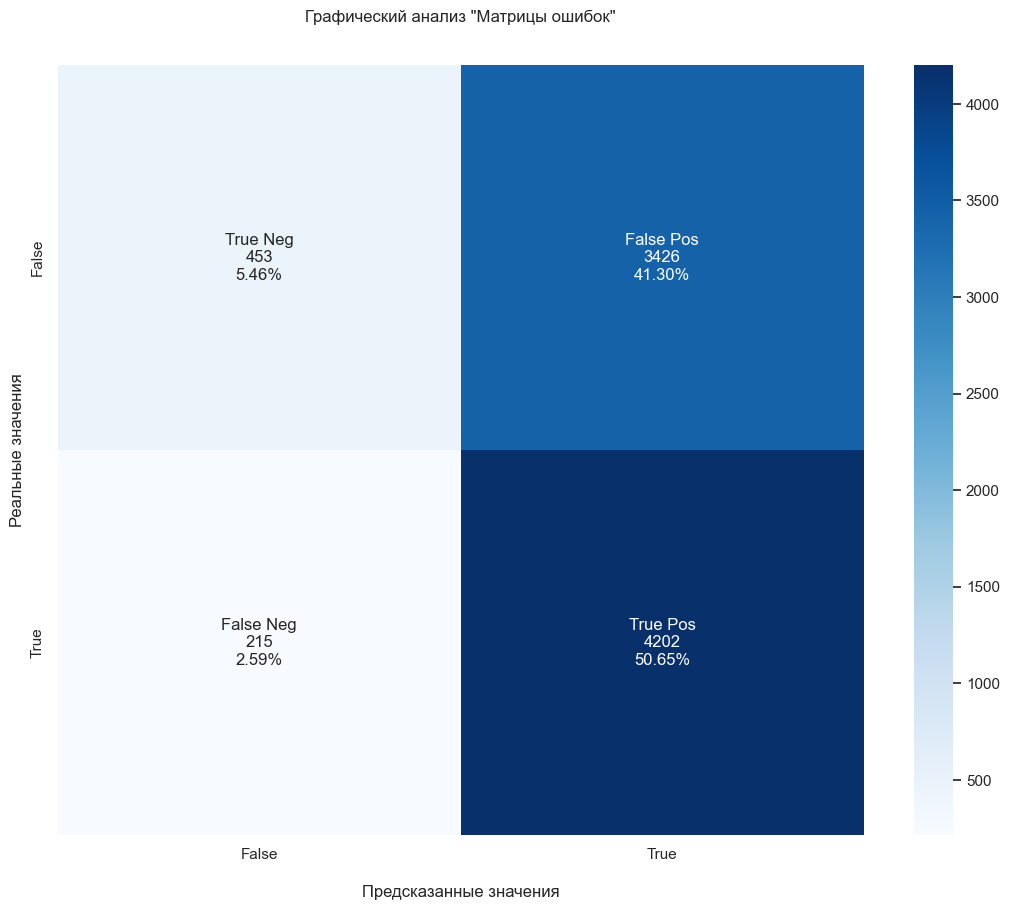

In [109]:
# Графический анализ матрицы ошибок
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Графический анализ "Матрицы ошибок"\n\n');
ax.set_xlabel('\nПредсказанные значения')
ax.set_ylabel('Реальные значения');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [110]:
recall = recall_score(y_test, pred,  average='binary',)
precision = precision_score(y_test, pred,  average='binary',)

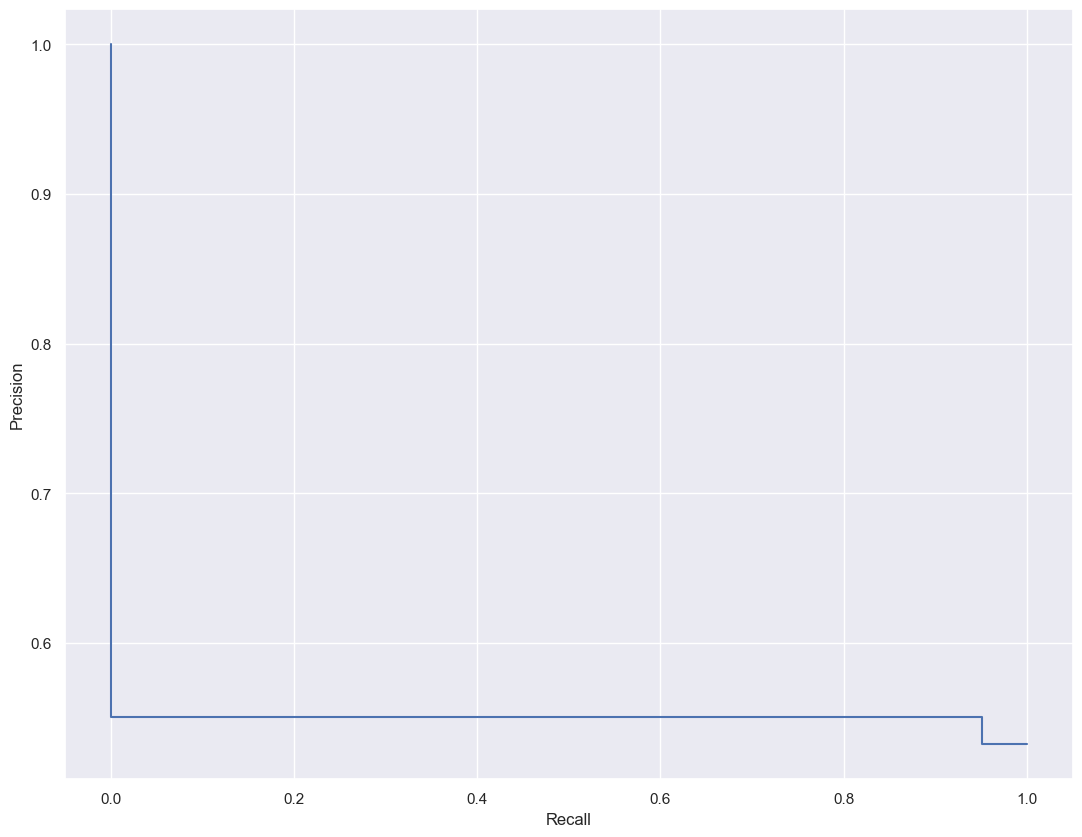

In [111]:
# График полнота-точность. Но что-то у меня с ним пошло не так. 
prec, recall, _ = precision_recall_curve(y_test, pred, pos_label=model_xgb.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [96]:
from xgboost import DMatrix

# посмотрю на важность признаков с помощью библиотеки Shap
explainer = shap.TreeExplainer(model_xgb)
train_dataset = DMatrix(data=X_train_xgb, label=y_train, enable_categorical=False)
shap_values = explainer.shap_values(train_dataset)

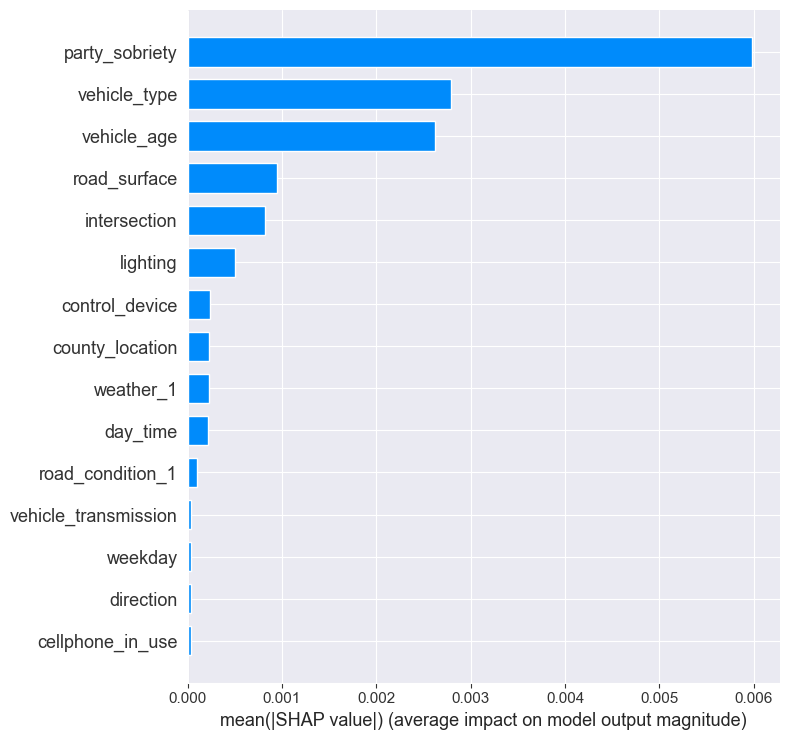

In [97]:
shap.summary_plot(shap_values, X_train_xgb, max_display=25, plot_type="bar")

Согласно полученному графику первое место по значимости для модели занял признак алкогольного опьянения. Влияние состояния алкогольного опьянения в 2 раза превышает влияние других факторов на вероятность ДТП. 
На втором месте оказался тип кузова автомобиля, а на третьем - возраст авто.

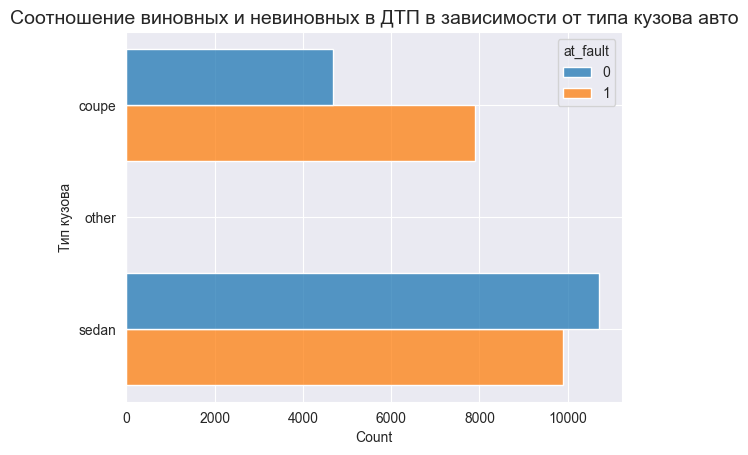

In [98]:
ax = sns.histplot(data=df, y='vehicle_type', hue='at_fault', multiple="dodge")
plt.title('Соотношение виновных и невиновных в ДТП в зависимости от типа кузова авто', fontsize=14)
plt.ylabel('Тип кузова')
plt.show()

In [99]:
df.vehicle_type.value_counts(normalize=True)

sedan   0.6203
coupe   0.3795
other   0.0001
Name: vehicle_type, dtype: float64

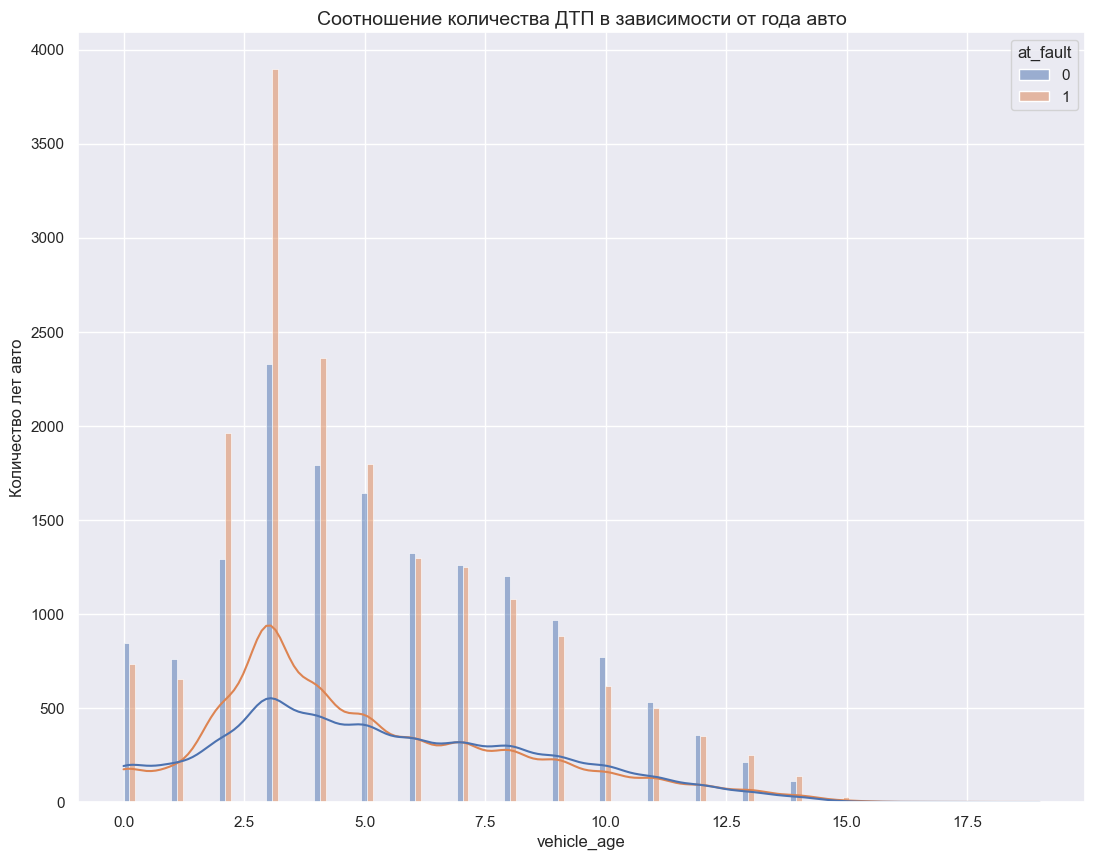

In [100]:
sns.set(rc={'figure.figsize':(13, 10)})

ax = sns.histplot(data=df, x='vehicle_age', hue='at_fault', 
                  multiple="dodge", kde=True)  
plt.title('Соотношение количества ДТП в зависимости от года авто', fontsize=14)
plt.ylabel('Количество лет авто')
plt.show()

In [101]:
df.vehicle_age.value_counts(normalize=True)

3    0.1876
4    0.1250
5    0.1037
2    0.0980
6    0.0790
7    0.0755
8    0.0686
9    0.0556
0    0.0475
1    0.0427
10   0.0418
11   0.0311
12   0.0212
13   0.0140
14   0.0075
15   0.0010
16   0.0002
17   0.0001
19   0.0000
Name: vehicle_age, dtype: float64

### По типу кузова. 
Больше всего ДТП происходит на авто с кузовом седан, на втором месте по аварийности кузов - купе. Но если смотреть на процентное соотношение выданных машин, то наибольшее количество выдано именно седанов, а купе находится на втором месте, поэтому и аварийность распределилась подобным образом. 
Можно предположить, что седаны, в связи с наиболее частым использованием, либо не проходят полноценные проверки перед выдачей, либо эти проверки недостаточны. Стоит в данной ситуации уделить внимание причинам ДТП с седанами и если в этих причинах окажутся поломки либо иные технические проблемы с машинами - состредоточить внимание на техосмотре машин перед выдачей.  

### По светофорам.
Более половины всех ДТП происходит на участках без регулирования светофором (либо отсутствие иных регулирующих знаков).  
Но при этом количество ДТП на регулируемых участках также присутствует. Их количество на 50% меньше.
В данной ситуации мне видится такое решение: в приложении сделать регулярно обновляющуюся ситуацию по состоянию светофоров на дорогах. И при прокладке маршрута предупреждать водителя о местах с отсутствием регулирующих устройств и повышенным риском аварий. Предлагать альтернативные маршруты, исключающие использование мест повышенной опасности. 

[К оглавлению](#section_0)
<a id='section_8'></a>
# Итоговый вывод
Лучшие показатели целевой метрики показала модель XGBClassifier. Предобработка данных для модели выполнена с помощью StandartScaler для численных признаков и OrdinalEncoder для категориальных признаков. 

Слишком много факторов, которые являются неуправляемыми рисками. В связи с этим сложно, мне кажется, сделать однозначное утверждение о возможности создания адекватной системы оценки риска при выдаче автомобиля. Можно приложить максимум усилий для сведения к минимуму вероятности происшествия ДТП для своего автомобиля путем использования современных систем контроля:
- состояния водителя,
- местоположения автомобиля на полосе движения и ухода с полосы, 
- окружающего состояния во время движения и парковки автомобиля.

В соответствии со статистическими данными, основным фактором ДТП является человеческий фактор. В связи с этим необходимо наибольшее внимание уделять состоянию водителя и уровню его навыков вождения.
На втором месте среди факторов ДТП находится состояние дороги. Поэтому стоит внимательнее изучить места произошедших ДТП. Возможно удастся выявить в наиболее частых местах какие-то особенности, оказавшие непосредственное влияние на возникновение в данном месте повышенного количества ДТП (плохой обзор, плохое состояние дорожного покрытия, слишком крутой поворот без соответствующих предупреждающих знаков).   
На третьем месте - состояние транспортного средства. То есть перед выдачей автомобиль должен проходить качественную проверку, исключающую возникновение нештатных ситуаций в связи с неудовлетворительным состоянием частей и агрегатов автомобиля. 